# Task-03

# Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# Dataset :- https://www.kaggle.com/c/dogs-vs-cats/data

In [2]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:/Downloads/Prodigy-InfoTech-2024-main/Prodigy-InfoTech-2024-main/PRODIGY_ML_03/datasets/dog vs cat/dataset/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:/Downloads/Prodigy-InfoTech-2024-main/Prodigy-InfoTech-2024-main/PRODIGY_ML_03/datasets/dog vs cat/dataset/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [3]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)



In [4]:
# create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))




In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_ds,epochs=3,validation_data=validation_ds)

Epoch 1/3
250/250 [==============================] - 391s 2s/step - loss: 0.6564 - accuracy: 0.6610 - val_loss: 0.6049 - val_accuracy: 0.6775
Epoch 2/3
250/250 [==============================] - 371s 1s/step - loss: 0.5528 - accuracy: 0.7229 - val_loss: 1.1869 - val_accuracy: 0.6085
Epoch 3/3
250/250 [==============================] - 374s 1s/step - loss: 0.4970 - accuracy: 0.7560 - val_loss: 0.6239 - val_accuracy: 0.6675


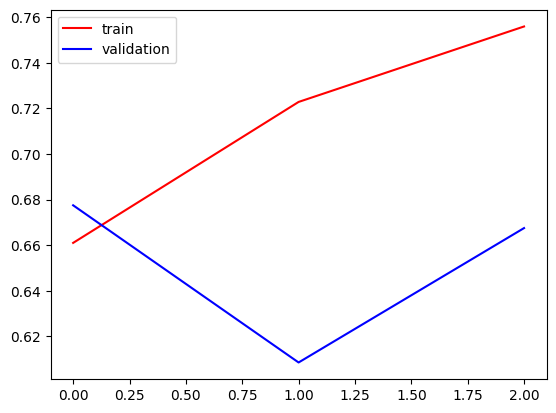

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

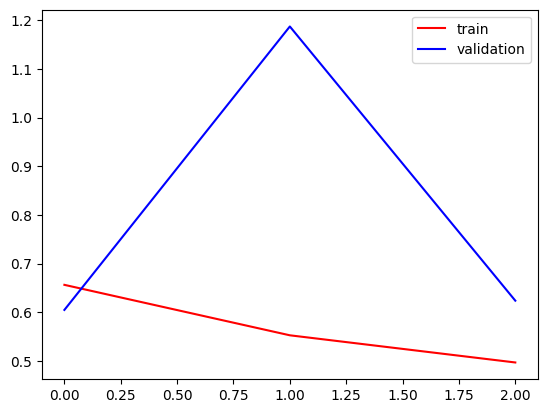

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
import cv2

In [21]:
test_img = cv2.imread('D:/Downloads/Prodigy-InfoTech-2024-main/Prodigy-InfoTech-2024-main/PRODIGY_ML_03/datasets/dog vs cat/dataset/training_set/dogs/dog.1.jpg')

In [20]:
from PIL import Image

try:
    test_img = Image.open("D:/Downloads/Prodigy-InfoTech-2024-main/Prodigy-InfoTech-2024-main/PRODIGY_ML_03/datasets/dog vs cat/dataset/training_set/cats/cat.1.jpg")
except Exception as e:
    print(f"Error loading the image: {e}")
    # Handle the error (e.g., print an error message, log the error, etc.)


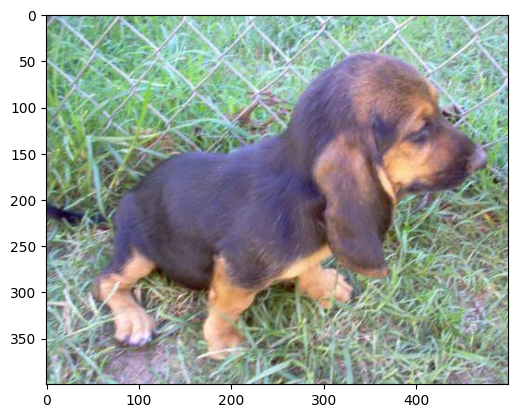

In [25]:
from PIL import Image
import numpy as np

try:
    test_img = Image.open("D:/Downloads/Prodigy-InfoTech-2024-main/Prodigy-InfoTech-2024-main/PRODIGY_ML_03/datasets/dataset/test_set/dogs/dog.4009.jpg")
    if test_img is not None:
        # Convert the image to a NumPy array and then to uint8
        test_img = np.array(test_img)
        if test_img.dtype != np.uint8:
            test_img = test_img.astype(np.uint8)

        # Display the image
        plt.imshow(test_img)
        plt.show()
    else:
        print("Image loading failed.")
except Exception as e:
    print(f"Error loading the image: {e}")


In [26]:
test_img.shape

(400, 500, 3)

In [27]:
test_img = cv2.resize(test_img,(256,256))

In [29]:
test_input = test_img.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


array([[0.9964547]], dtype=float32)